# About Adult Dataset

-> **income**(target): whether or not an individual makes more than $50,000 annually.(<= 50K, >50K)

-> **age**: the age of an individual. (Integer > 0)

-> **workclass**: represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)

-> **fnlwgt** (final weight): this is the number of people the census believes the entry represents. People with similar  characteristics should have similar weights

-> **education**: level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)

-> **education-num**: the level of education achieved in numerical form. (Integer >0)

-> **marital-status**: marital status of an individual (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)

-> **occupation**: type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)

-> **relationship**: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)

-> **race**: Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)

--> gender: (Male, female)

-> **capital-gain**: capital gains for an individual. (>=0)

-> **capital-loss**: capital loss for an individual. (>= 0)

->**hours-per-week**: the hours an individual has reported to work per week. (continuous)

In [22]:
#imports
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns

In [2]:
#read dataset
df = pd.read_csv("adult.csv")

# EDA

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


data not have missing value.

data contain 48842 entries, 0 to 48841

In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# checking missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
## Check for Duplicates and Remove
df.duplicated().sum()
df.drop_duplicates(inplace = True)

In [8]:
df.replace('?', np.NaN, inplace = True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
import pandas as pd

# Drop rows with null values
df.dropna(inplace=True)

# Remove quotation marks from string columns
df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)


In [10]:
# unique values of each column
for col in df.select_dtypes(include="object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("**********************************************************")

workclass
***
Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64
**********************************************************
education
***
HS-grad         9834
Some-college    6669
Bachelors       5042
Masters         1626
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          287
1st-4th          149
Preschool         44
Name: education, dtype: int64
**********************************************************
marital.status
***
Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64
*****

Work class : (7 categories)

Education : Ordinal (16 categories)

Marital Status: Nominal (7 categories)

Occupation : Nominal (15 categories)

Relationship : Nominal (6 categories)

Race: Nominal (5 categories)

Gender: Nominal (2 categories)

In [14]:
df["education.num"].value_counts(dropna=False)

9     9834
10    6669
13    5042
14    1626
11    1307
7     1048
12    1008
6      820
4      556
15     542
5      455
8      377
16     375
3      287
2      149
1       44
Name: education.num, dtype: int64

In [15]:
df.groupby("education")["education.num"].value_counts(dropna=False)

education     education.num
10th          6                 820
11th          7                1048
12th          8                 377
1st-4th       2                 149
5th-6th       3                 287
7th-8th       4                 556
9th           5                 455
Assoc-acdm    12               1008
Assoc-voc     11               1307
Bachelors     13               5042
Doctorate     16                375
HS-grad       9                9834
Masters       14               1626
Preschool     1                  44
Prof-school   15                542
Some-college  10               6669
Name: education.num, dtype: int64

we see education and educational-num are the same

# Data Visualization

<Axes: >

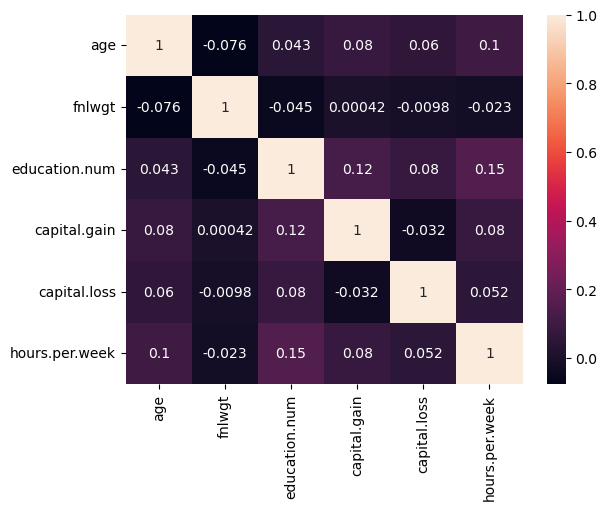

In [16]:
sns.heatmap(data=df.select_dtypes("number").corr(), annot=True)

<Axes: xlabel='relationship', ylabel='count'>

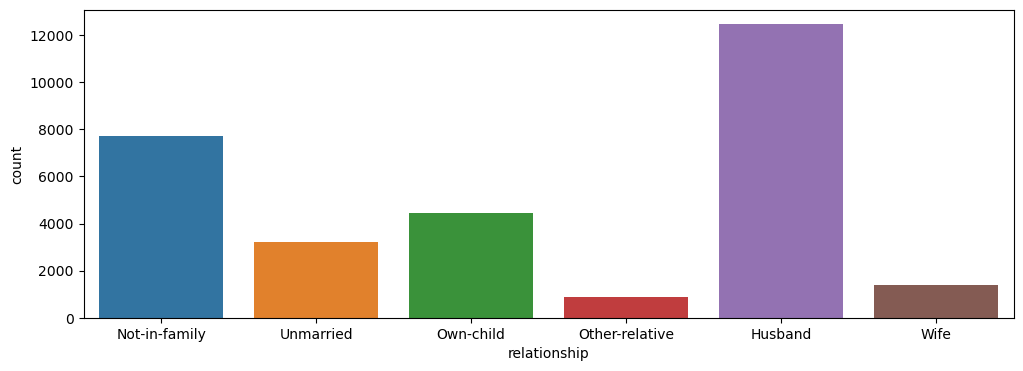

In [17]:
plt.figure(figsize=(12,4))
total = float(len(df) )
sns.countplot(x="relationship", data=df)


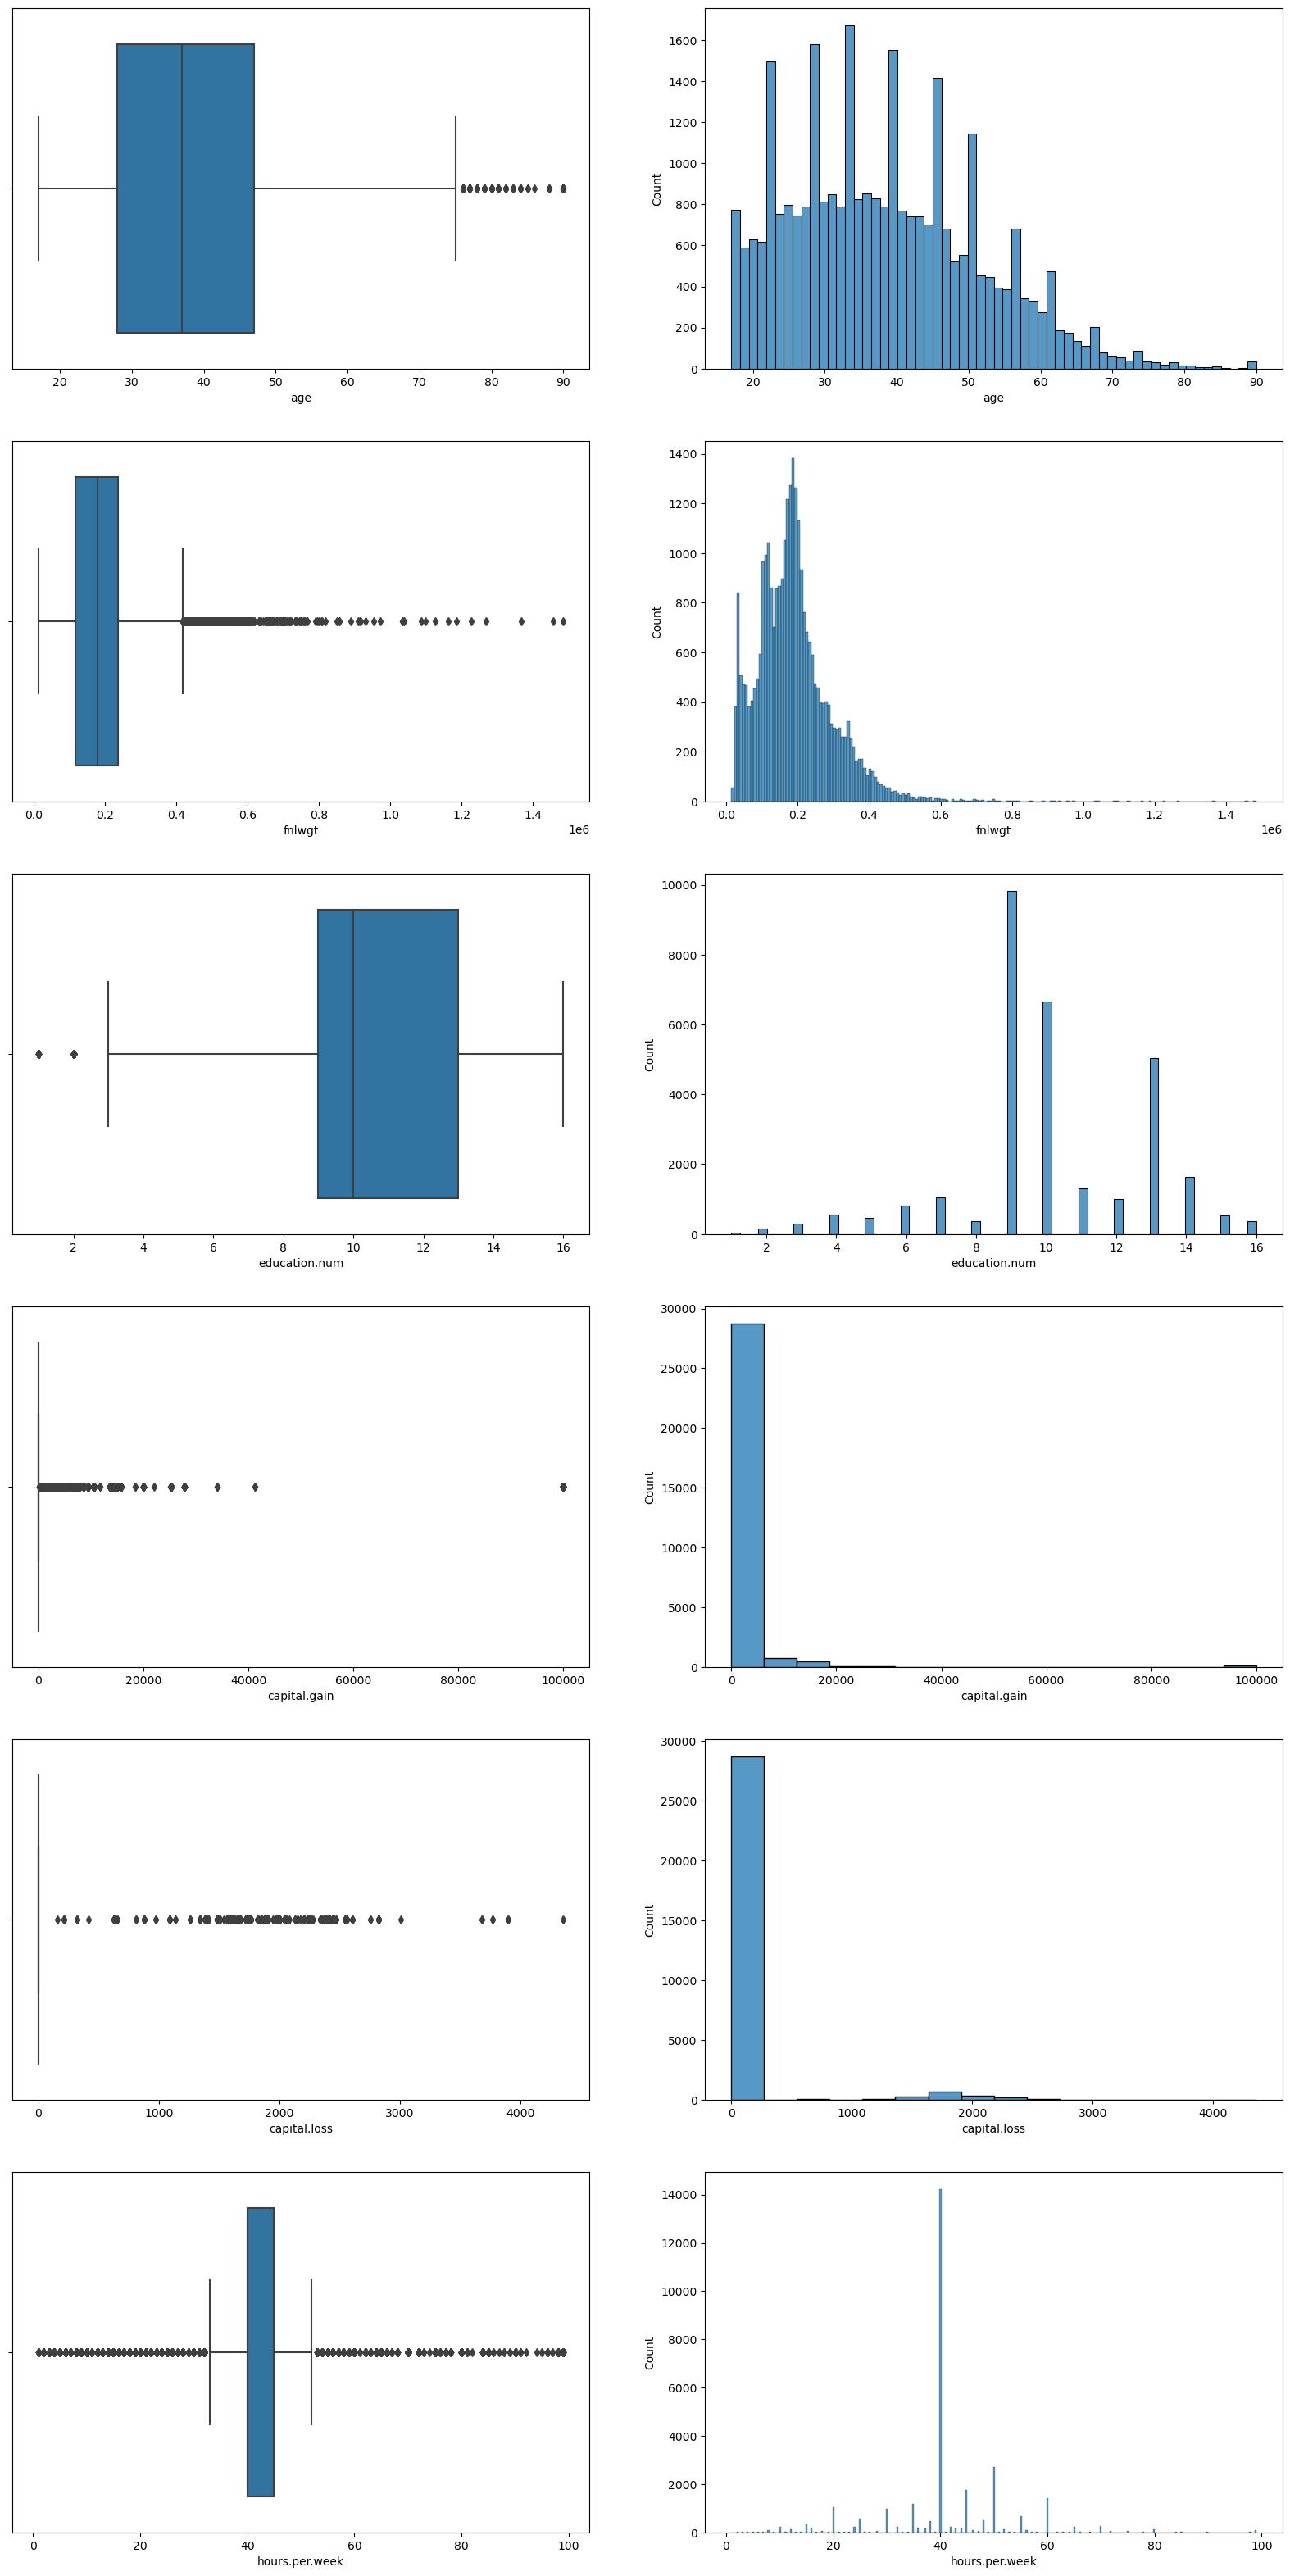

In [18]:
#Boxplot and Histplot for all numeric features
index=0
plt.figure(figsize=(20,40))
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.subplot(6,2,index)
    sns.boxplot(x=feature,data=df,whis=1.5)
    index+=1
    plt.subplot(6,2,index)
    sns.histplot(x=feature,data=df)


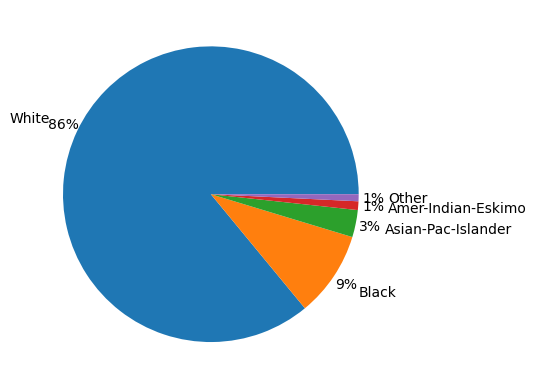

In [19]:
#visiualize How many of each race are represented in this dataset
plt.pie(df.race.value_counts(), labels=df.race.value_counts().index, autopct='%.0f%%', labeldistance=1.2, pctdistance=1.1);

10th             820
11th            1048
12th             377
1st-4th          149
5th-6th          287
7th-8th          556
9th              455
Assoc-acdm      1008
Assoc-voc       1307
Bachelors       5042
Doctorate        375
HS-grad         9834
Masters         1626
Preschool         44
Prof-school      542
Some-college    6669
Name: education, dtype: int64


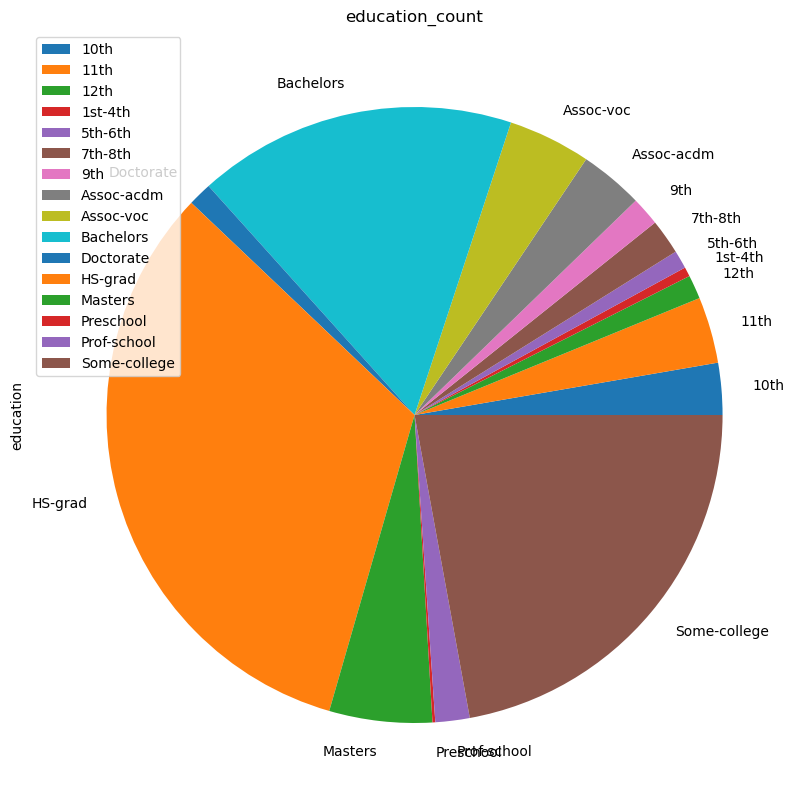

In [20]:
counts=df['education'].value_counts().sort_index()
print(counts)
counts.plot(kind='pie',title='education_count',figsize=(11,10))
plt.legend()
plt.show()

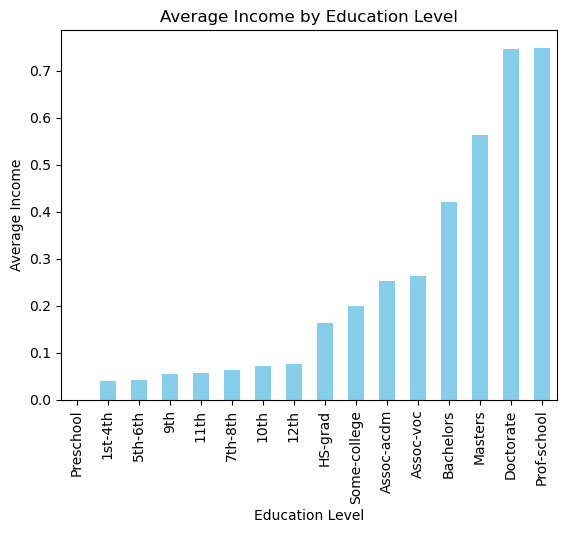

In [24]:
# Group by education and calculate the average income for each education level
average_income_by_education = df.groupby("education")["income"].mean()

# Sort the values for better visualization (optional)
average_income_by_education = average_income_by_education.sort_values()

# Create bar plot
average_income_by_education.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')

# Show plot
plt.show()

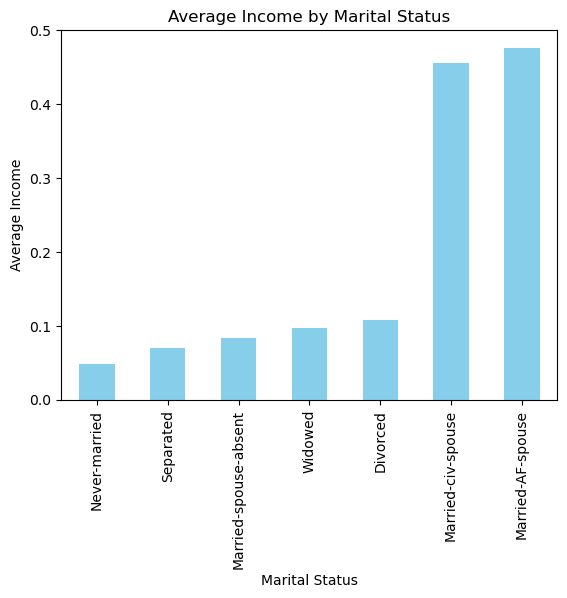

In [26]:
average_income_by_marital_status = df.groupby("marital.status")["income"].mean()

# Sort the values for better visualization (optional)
average_income_by_marital_status = average_income_by_marital_status.sort_values()

# Create bar plot
average_income_by_marital_status.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Average Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')

# Show plot
plt.show()

# PreProcessing

- education = Education Number so we can drop one of them
- capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k). Also from df.describe() we can see that most of value are zero, so we can even remove this
- Capital_loss also same capital gain so we can remove this also

In [28]:
df.drop(['education','capital.gain','capital.loss'], axis = 1, inplace = True)

# Encoding

In [30]:
# encode the categorical columns
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,2,132870,9,6,3,1,4,0,18,38,0
3,54,2,140359,4,0,6,4,4,0,40,38,0
4,41,2,264663,10,5,9,3,4,0,40,38,0
5,34,2,216864,9,0,7,4,4,0,45,38,0
6,38,2,150601,6,5,0,4,4,1,40,38,0


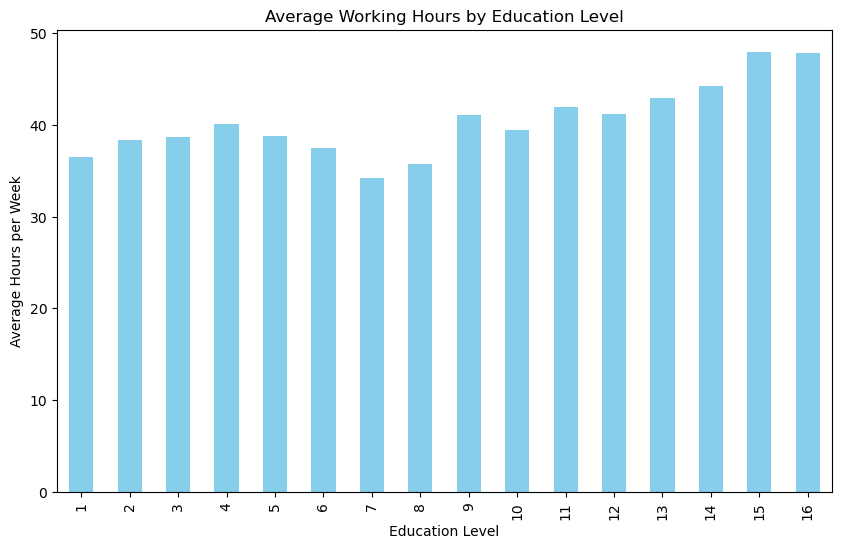

In [33]:
# Average Working Hours by Education Level

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
df.groupby('education.num')['hours.per.week'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Average Hours per Week')
_ = plt.title('Average Working Hours by Education Level')

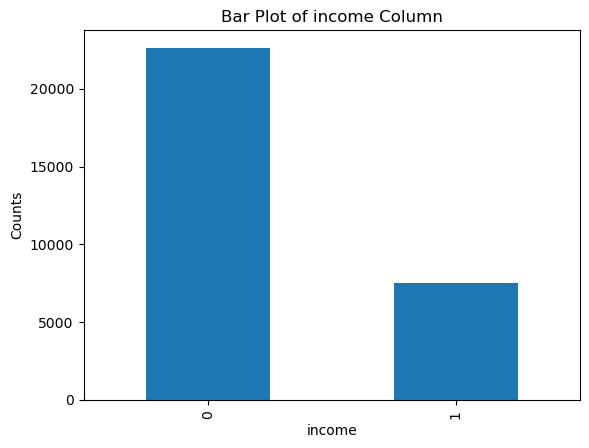

In [34]:
# Calculate the value counts of the target column
value_counts = df['income'].value_counts()

# Create bar plot
value_counts.plot(kind='bar')

# Add title and labels
plt.title('Bar Plot of income Column')
plt.xlabel('income')
plt.ylabel('Counts')

# Show plot
plt.show()

### data is not balanced


